# 1. Segmentación de datos de redes sociales.

__En el archivo “snsdata.csv” se encuentran los términos más utilizados en unos 30.000 perfiles aleatorios de adolescentes de una red social. Importar el archivo y separar el conjunto de datos en dos según el género de los usuarios (F y M). En cada uno de los subconjuntos de datos eliminar el año de graduación ('gradyear'), el género ('gender') y la edad (‘age’). Utilizando el algoritmo de k-means identificar el número de segmentos óptimos en los que se divide cada subconjunto de datos y obtener los valores de los centroides.__

In [12]:
%pylab
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


Cargamos el fichero con los datos.

In [13]:
snsdata = pd.read_csv('snsdata.csv', sep = ',')

Separamos en dos: según género (F y M).

In [14]:
snsdata_f = snsdata[snsdata.gender=='F']
snsdata_m = snsdata[snsdata.gender=='M']

Eliminamos el año de graduación, el género y la edad de cada uno de los subconjuntos.

In [15]:
# Subconjunto mujeres
snsdata_f.pop('gradyear')
snsdata_f.pop('gender')
snsdata_f.pop('age')

# Subconjunto hombre
snsdata_m.pop('gradyear')
snsdata_m.pop('gender')
snsdata_m.pop('age')

snsdata_m.head(5)

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25,33,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


Utilizamos el algoritmo k-means para identificar el número de segmentos óptimo para cada subconjunto de datos.

Para calcular los segmentos óptimos existen varios métodos: https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set

Vamos a probar 2 métodos para comprobar los resultados.

In [34]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        D_k = cdist(x, kmeans.cluster_centers_, 'euclidean')
        dist = np.min(D_k, axis = 1)
        meandistortions.append(sum(dist) / x.shape[0])
    
    fig = plt.figure(figsize=(20,10))
    plt.plot(range(1, max_k), meandistortions, 'b*-')
    plt.grid(True)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Distorsion promedio')
    plt.title(figure_name)
    

def plot_silhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
    
    fig = plt.figure(figsize=(20,10))
    plt.plot(range(2, max_k), sillhouette_avgs, 'b*--')
    plt.grid(True)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Silhouette')
    plt.title(figure_name)


Analizamos el conjunto femenino:

__Método evaluación de la distorsión__

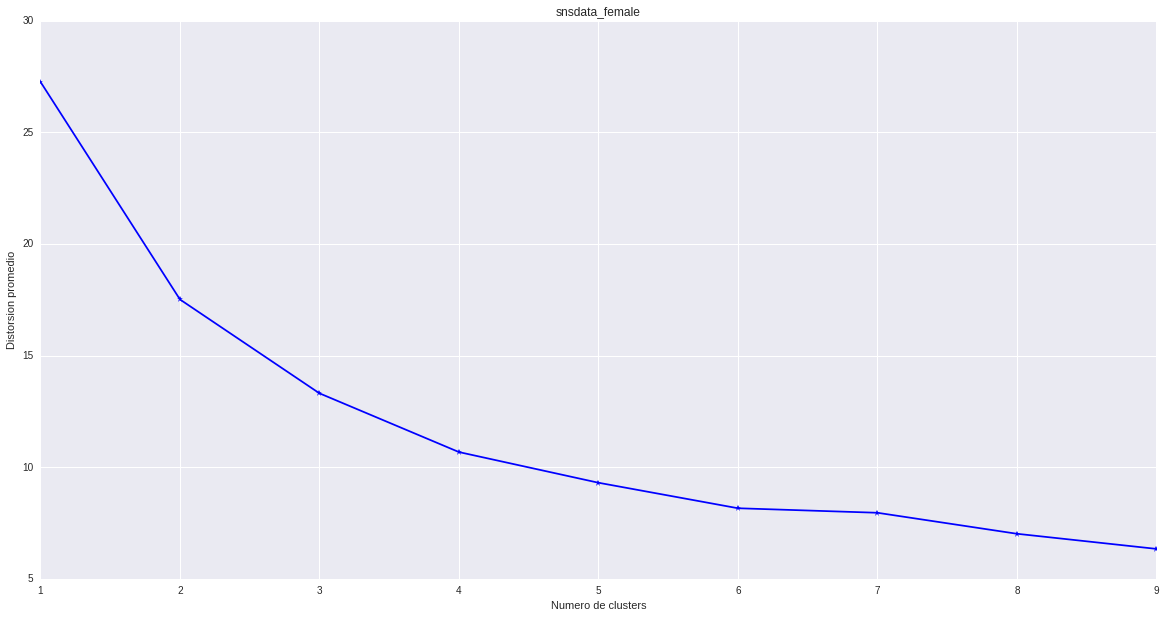

In [17]:
plot_distorsion(snsdata_f, "snsdata_female", max_k = 10)

__Método Silhouette__    

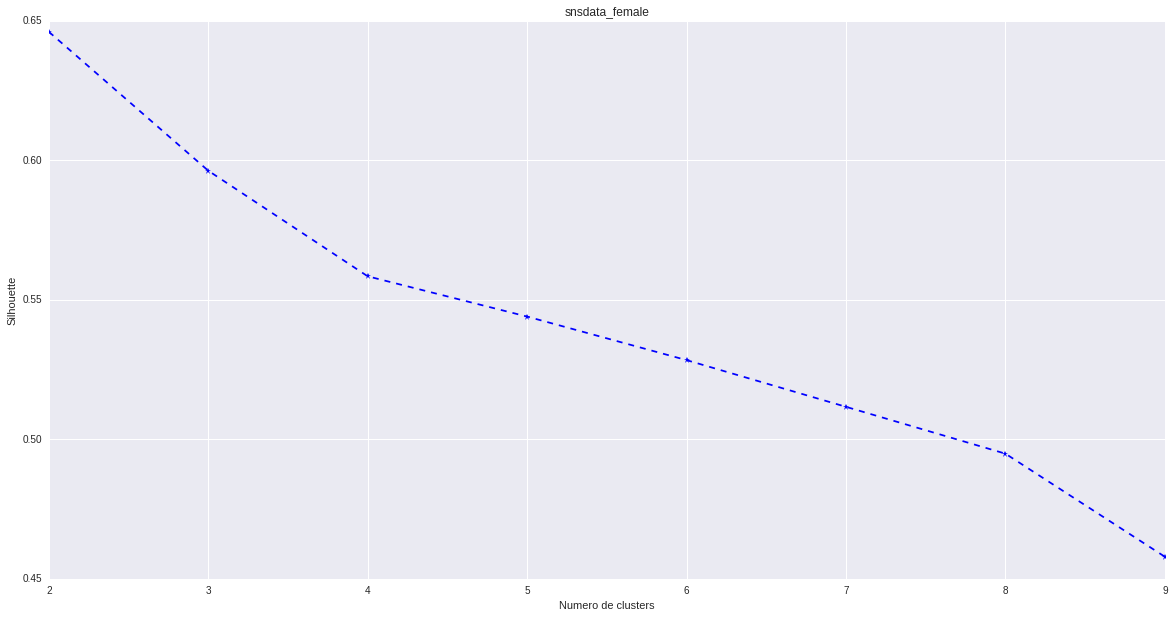

In [26]:
plot_silhouette(snsdata_f, "snsdata_female", max_k = 10)

Vemos que para el __conjunto femenino el valor óptimo de clusters es 6__, puesto que es a partir de donde deja de apreciarse mejora en la dispersión.

Calculamos los centroides:

In [118]:
kmeans = KMeans(n_clusters = 6, n_init = 10).fit(snsdata_f)
kmeans.cluster_centers_

array([[  2.65409863e+01,   2.74820379e-01,   2.21423906e-01,
          2.62410189e-01,   1.90888308e-01,   1.96766819e-01,
          1.54800784e-01,   1.37165251e-01,   6.97256695e-02,
          9.16067929e-02,   1.31286741e-01,   3.99412149e-01,
          2.37426519e-01,   1.56760287e-01,   1.49738733e-01,
          1.15774004e-01,   5.05715219e-01,   3.41280209e-01,
          4.47419987e-02,   8.24297845e-01,   2.60287394e-01,
          4.76812541e-01,   2.68125408e-01,   1.09568909e-01,
          2.20444154e-02,   4.96734161e-01,   1.40104507e-01,
          9.97713912e-02,   2.84454605e-01,   4.42684520e-01,
          1.71946440e-01,   7.31548008e-02,   5.38863488e-02,
          1.89745265e-01,   1.25571522e-01,   9.71587198e-02,
          6.00914435e-02],
       [  1.50249589e+02,   3.99014778e-01,   3.20197044e-01,
          2.13464696e-01,   3.33333333e-01,   2.62725780e-01,
          1.74055829e-01,   2.13464696e-01,   7.88177340e-02,
          8.21018062e-02,   1.33004926e-01,

Analizamos el conjunto masculino:

__Método evaluación de la distorsión__

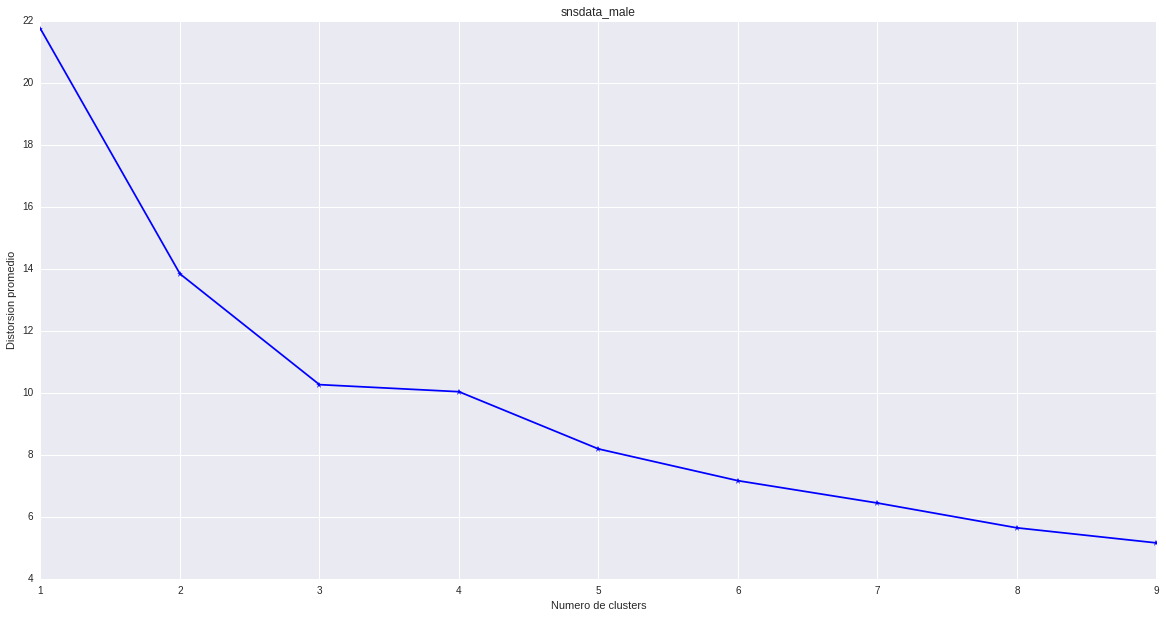

In [32]:
plot_distorsion(snsdata_m, "snsdata_male", max_k = 10)

__Método Silhouette__

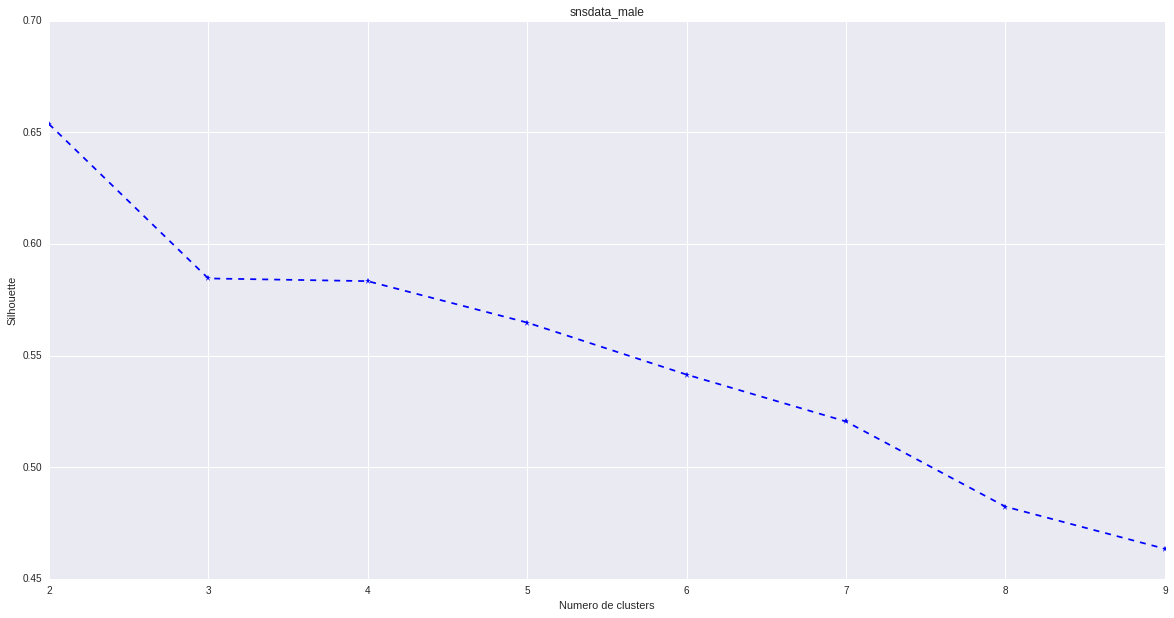

In [35]:
plot_silhouette(snsdata_m, "snsdata_male", max_k = 10)

Vemos que para el __conjunto masculino el valor óptimo de clusters es 4__.

Calculamos los centroides:

In [27]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(snsdata_m)
kmeans.cluster_centers_

array([[  8.66420991e+00,   2.90094340e-01,   4.32193396e-01,
          1.90448113e-01,   5.89622642e-03,   2.85966981e-02,
          7.57665094e-02,   8.25471698e-03,   2.44103774e-01,
          8.78537736e-02,   1.92216981e-01,   6.10259434e-02,
          1.58313679e-01,   7.81250000e-02,   5.12971698e-02,
          5.12971698e-02,   1.89858491e-01,   3.16627358e-01,
          4.36320755e-02,   6.42983491e-01,   2.31426887e-01,
          4.00353774e-01,   1.70400943e-01,   1.06721698e-01,
          2.53537736e-02,   1.73054245e-01,   2.97759434e-02,
          1.94575472e-02,   1.13502358e-01,   3.89150943e-02,
          6.86910377e-02,   2.65330189e-02,   2.00471698e-02,
          1.68926887e-01,   1.06426887e-01,   6.51533019e-02,
          5.57193396e-02],
       [  4.42006579e+01,   3.51973684e-01,   4.83552632e-01,
          2.45394737e-01,   1.18421053e-02,   4.34210526e-02,
          8.75000000e-02,   5.92105263e-03,   2.95394737e-01,
          1.17763158e-01,   2.13815789e-01,

# 2. Componentes principales.

__En el archivo “concrete.csv” se encuentran los datos de diferentes mezclas de hormigón. Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 50%, 75% y 90% de la varianza. Obtener el porcentaje de la varianza que explica la primera componente principal.__

Cargamos los datos del fichero.

In [124]:
concrete = pd.read_csv('concrete.csv', sep = ',')
concrete.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Utilizamos el Análisis de Componentes Principales (PCA).

In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
concrete_pca = pca.fit_transform(concrete)

for i in range(shape(concrete_pca)[1]):
    print "Varianza explicada con", i + 1, "componentes:", pca.explained_variance_ratio_[range(i + 1)].sum()

Varianza explicada con 1 componentes: 0.324912981545
Varianza explicada con 2 componentes: 0.572433128251
Varianza explicada con 3 componentes: 0.756005146663
Varianza explicada con 4 componentes: 0.863007419816
Varianza explicada con 5 componentes: 0.963442482825
Varianza explicada con 6 componentes: 0.99538827368
Varianza explicada con 7 componentes: 0.997959553583
Varianza explicada con 8 componentes: 0.999716380907
Varianza explicada con 9 componentes: 1.0


Vemos que el 50% de la varianza se puede explicar con 2 componentes principales.

El 75% de la varianza se puede explicar con 3 componentes principales.

El 90% de la varianza se puede explicar con 5 componentes principales.

In [134]:
print 'La primera componente principal explica el', pca.explained_variance_ratio_[range(1)].sum()*100, '% de la varianza'

La primera componente principal explica el 32.4912981545 % de la varianza


# 3. Regresión de una función con Theano.

__Crear un conjunto de datos utilizando el siguiente código:__
```
trX	=	np.linspace(-1,	1,	101)	
trY	=	np.linspace(-1,	1,	101)	
for	i	in	range(len(trY)):	
	 	 	 	 trY[i]	 =	 math.log(1	 +	 0.5	 *	 abs(trX[i]))	 +	 trX[i]	 /	 3	 +	
np.random.randn()	*	0.033
```
__Ahora utilizar Theano para obtener los parámetros w_0 y w_1 del siguiente modelo:__
```
y = log(1 + w_0 |x|) + w_1 x,
```
__utilizando los datos generados anteriormente.__

Importamos la librería Theano que vamos a utilizar en este ejercicio.

In [141]:
import theano
import theano.tensor as T

Creamos el conjunto de datos según lo indicado anteriormente.

In [137]:
trX = np.linspace(-1,1,101)
trY = np.linspace(-1,1,101)

for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i]/3 + np.random.randn()*0.033

Definimos como objetos Theano las variables que vamos a obtener.

In [152]:
X = T.scalar()
Y = T.scalar()

Definimos el modelo como una función:

In [148]:
# Definimos el modelo
def model(X, w0, w1):
    return log(1 + w0 * abs(X)) + w1 * X


Ahora, debemos hallar los valores de w_0 y w_1 para este modelo

In [151]:
# Definimos las variables compartidas
w0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w1 = theano.shared(np.asarray(0., dtype = theano.config.floatX))

# La salida, por tanto, debe ser la siguiente:
y = model(X, w0, w1)

cost = T.mean(T.sqr(y - Y))
gradient_w0 = T.grad(cost = cost, wrt = w0)
gradient_w1 = T.grad(cost = cost, wrt = w1)

updates  = [[w0, w0 - gradient_w0 * 0.01], [w1, w1 - gradient_w1 * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

for i in range(20):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print 'En el paso', i, 'el valor de w_0 es', w0.get_value(), 'y w_1 es', w1.get_value(), 'con un coste de', cost_i

En el paso 0 el valor de w_0 es 0.195787910793 y w_1 es 0.165580830745 con un coste de 0.146211306152
En el paso 1 el valor de w_0 es 0.299092021751 y w_1 es 0.249915513634 con un coste de 0.0435980525379
En el paso 2 el valor de w_0 es 0.361711005076 y w_1 es 0.291249202303 con un coste de 0.0137702368059
En el paso 3 el valor de w_0 es 0.401908249239 y w_1 es 0.311026907146 con un coste de 0.00447299647662
En el paso 4 el valor de w_0 es 0.42846063875 y w_1 es 0.320230409192 con un coste de 0.00144616925209
En el paso 5 el valor de w_0 es 0.446276964459 y w_1 es 0.324340362105 con un coste de 0.000441461452096
En el paso 6 el valor de w_0 es 0.458340797387 y w_1 es 0.326050870164 con un coste de 0.000114208637894
En el paso 7 el valor de w_0 es 0.466554410882 y w_1 es 0.326667219933 con un coste de 1.81888525922e-05
En el paso 8 el valor de w_0 es 0.472165580861 y w_1 es 0.326810448775 con un coste de 3.3568861913e-08
En el paso 9 el valor de w_0 es 0.476007020571 y w_1 es 0.32676843

Podemos ver que los valores de w_0 y w_1 para este modelo son:
    
    w_0 = 0.484
    w_1 = 0.326